<a href="https://colab.research.google.com/github/Namokar100/AI-Mock-Interview-Prep/blob/main/soil_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install tensorflow matplotlib scikit-learn

In [37]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [38]:
!unzip soils_dataset.zip

Archive:  soils_dataset.zip
replace soils_dataset/alluvial/Alluvial0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: soils_dataset/alluvial/Alluvial0.jpg  
  inflating: soils_dataset/alluvial/Alluvial1.jpg  
  inflating: soils_dataset/alluvial/Alluvial10.jpg  
  inflating: soils_dataset/alluvial/Alluvial11.jpg  
  inflating: soils_dataset/alluvial/Alluvial12.jpg  
  inflating: soils_dataset/alluvial/Alluvial13.jpg  
  inflating: soils_dataset/alluvial/Alluvial14.jpg  
  inflating: soils_dataset/alluvial/Alluvial15.jpg  
  inflating: soils_dataset/alluvial/Alluvial16.jpg  
  inflating: soils_dataset/alluvial/Alluvial17.jpg  
  inflating: soils_dataset/alluvial/Alluvial18.jpg  
  inflating: soils_dataset/alluvial/Alluvial19.jpg  
  inflating: soils_dataset/alluvial/Alluvial2.jpg  
  inflating: soils_dataset/alluvial/Alluvial20.jpg  
  inflating: soils_dataset/alluvial/Alluvial21.jpg  
  inflating: soils_dataset/alluvial/Alluvial22.jpg  
  inflating: soils_dataset/alluvial/Alluv

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [40]:
img_size = (224, 224)  # MobileNetV2 input size
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    'soils_dataset/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    'soils_dataset/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 510 images belonging to 6 classes.
Found 126 images belonging to 6 classes.


In [41]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base layers

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation='softmax')  # 6 soil types
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [42]:
history = model.fit(train_data, validation_data=val_data, epochs=15)


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 949ms/step - accuracy: 0.2491 - loss: 2.0404 - val_accuracy: 0.4683 - val_loss: 1.3584
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 485ms/step - accuracy: 0.4951 - loss: 1.3325 - val_accuracy: 0.5238 - val_loss: 1.2060
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 500ms/step - accuracy: 0.5851 - loss: 1.1405 - val_accuracy: 0.5556 - val_loss: 1.0965
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 473ms/step - accuracy: 0.6405 - loss: 1.0231 - val_accuracy: 0.5794 - val_loss: 1.1005
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 482ms/step - accuracy: 0.6234 - loss: 1.0168 - val_accuracy: 0.5794 - val_loss: 1.0497
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 422ms/step - accuracy: 0.6544 - loss: 0.9793 - val_accuracy: 0.6349 - val_loss: 1.0412
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 476ms/step - accuracy: 0.6531 - loss: 0.8773 - val_accuracy: 0.6111 - val_loss: 1.0225
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 535ms/step - accuracy: 0.7113 - loss: 0.7776 - val_accuracy: 0

<ipython-input-48-1a06f06ba5a2>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


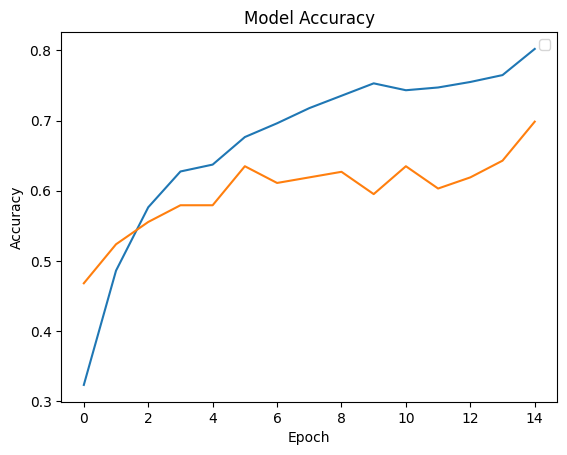

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()


In [44]:
model.save('my_model.keras')

plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Validation')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()


Saving Sandy7.jpg to Sandy7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


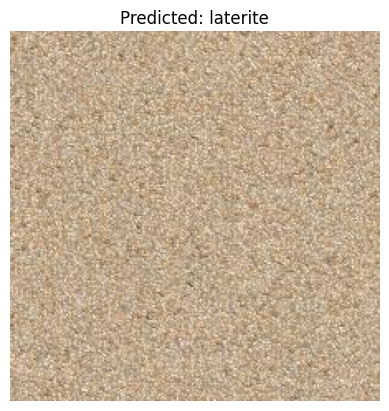

In [45]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_uploaded_image():
    # Upload an image file
    uploaded = files.upload()

    for img_path in uploaded.keys():
        # Load and preprocess image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Make prediction
        prediction = model.predict(img_array)
        class_index = np.argmax(prediction)
        class_label = list(train_data.class_indices.keys())[class_index]

        # Display image and result
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Predicted: {class_label}")
        plt.show()

# Run this function
predict_uploaded_image()


Enter image URL: https://www.shutterstock.com/image-photo/hands-holding-abundance-soil-agriculture-260nw-2281096787.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


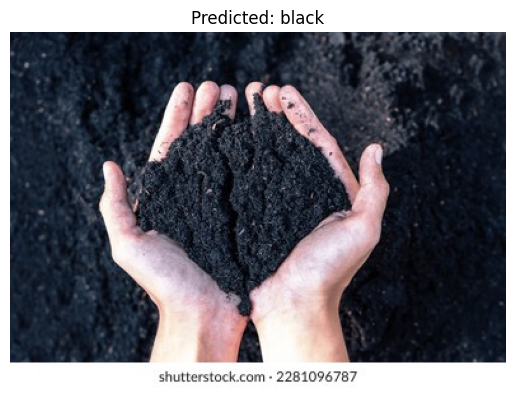

In [46]:
import requests
from PIL import Image
from io import BytesIO

def predict_from_url():
    # Ask for image URL
    image_url = input("Enter image URL: ")

    try:
        # Fetch and open image
        response = requests.get(image_url)
        img = Image.open(BytesIO(response.content)).convert("RGB")
        img_resized = img.resize((224, 224))

        # Preprocess image
        img_array = np.array(img_resized) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)
        class_index = np.argmax(prediction)
        class_label = list(train_data.class_indices.keys())[class_index]

        # Show image and result
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Predicted: {class_label}")
        plt.show()

    except Exception as e:
        print("Failed to process the image. Error:", e)

# Run this function
predict_from_url()
